<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch08_SystemesDifferentiels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch08 - Notebook : Systèmes différentiels à matrice diagonalisable**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **1.1. Système de deux équations à deux fonctions inconnues, séparées**

$\left\{\begin{matrix}
 x'& = & x &  &  \\
 y'& = &  & - & 2y \\
\end{matrix}\right.$

On a vu que les couples de fonctions solutions étaient de la forme:

$\left\{\begin{matrix}
 x'(t)& = & a.e^xt    \\
 y'(t)& = & b.e^{-2t} \\
\end{matrix}\right.$

où a et b sont deux constantes dépendant des conditions initiales.



* **Visualisation des "trajectoires"**

un exemple :    
avec $a = 1$ et $b = 1$


In [ ]:
# imports bibliothèques
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


In [ ]:
# Fonction cosmétique de paramètres graphiques
def centrax():
    # configuration des axes à l'origine (pas à connaître)
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.set_aspect('equal')   # repère orthonormé

    # nom des axes
    plt.xlabel('x')
    plt.ylabel('y') 

In [ ]:
# initialisations

# vecteur temps
t = np.linspace(-2, 2, 41)

# paramètres dépendant des conditions initiales
a = 1
b = 1

# fonctions x et y définies en tant que "lambda-fonctions"
x = lambda t : a * np.exp(t)
y = lambda t : b * np.exp(-2*t)

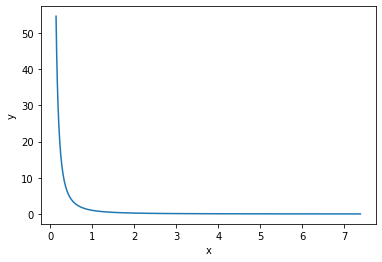

In [ ]:
# représentations graphiques des courbes (x,y), de paramètres t

plt.plot(x(t), y(t))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Généralisons...

In [ ]:
def trajectoire(t,a,b, couleur = "blue") :
    # redéfinition des fonctions x et y par des lambda-fonctions
    x = lambda t : a * np.exp(t)
    y = lambda t : b * np.exp(-2*t)

    # Représentation graphique d'une trajectoire
    plt.plot(x(t), y(t), color = couleur, linewidth = 0.5, marker = "o", markersize = 2)
    
    # Ajustements cosmétiques
    centrax()

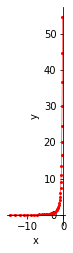

In [ ]:
trajectoire(t,-2,1, "red")
plt.show()

* si $a=0$ et $b=0$ 

    les deux fonctions x et y sont constantes nulles, quel que soit t.

    La trajectoire est alors réduite au point (0;0)

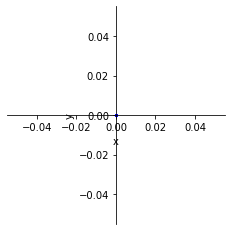

In [ ]:
trajectoire(t,0,0, "blue")
plt.show()

**Faisceau de trajectoires :**

On trace plusieurs trajectoires, avec a et b égaux variant entre -3 et 3, le paramètre t variant entre -0.5 et 0.5 .

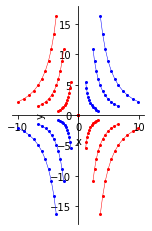

In [ ]:
t = np.linspace(-0.5, 0.5, 11)

for k in range(-3,4) :
    # a et b de même signe
    a = b = 2*k
    trajectoire(t,a,b,'blue')

    # a et b de signes contraires
    a = 2*k
    b =-2*k
    trajectoire(t,a,b,'red')

plt.show()

* **Exercice**

    * Refaire le faisceau de trajectoires (également appelé "*portrait de phase*") en remplaçant simplement le -2 de la 2<sup>ème</sup> équation par 2.
    * Expliquer ce portrait.

*  **Corrrection**

In [ ]:
def trajectoire(t,a,b, couleur = "blue") :
    # redéfinition des fonctions x et y par des lambda-fonctions
    x = lambda t : a * np.exp(t)
    y = lambda t : b * np.exp(2*t)    

    # Représentation graphique d'une trajectoire
    plt.plot(x(t), y(t), color = couleur, linewidth = 0.5, marker = "o", markersize = 2)
    
    # Ajustements cosmétiques
    centrax()

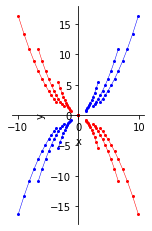

In [ ]:
t = np.linspace(-0.5, 0.5, 11)

for k in range(-3,4) :
    # a et b de même signe
    a = b = 2*k
    trajectoire(t,a,b,'blue')

    # a et b de signes contraires
    a = 2*k
    b =-2*k
    trajectoire(t,a,b,'red')

plt.show()

## **1.2. Un système de deux équations différentielles à deux fonctions inconnues imbriquées, diagonalisable**

$\left\{\begin{matrix}
 x'& =  & -3x & + &  y\\
 y'& = & x & - & 3y \\
\end{matrix}\right.$

In [ ]:
import numpy as np
import numpy.linalg as al

* **Matrice du système**

In [ ]:
A = np.array([[-3, 1 ], [ 1, -3]])
A

array([[-3,  1],
       [ 1, -3]])

* **Diagonalisation de la matrice du système**

In [ ]:
D, V = al.eig(A)
D = np.diag(D)
D

array([[-2.,  0.],
       [ 0., -4.]])

In [ ]:
V

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

* **Récupération des valeurs propres et vecteurs propres**

In [ ]:
V1 = np.array([[V[i][0] for i in range(len(D))]])
V1 = np.transpose(V1)
V1

array([[0.70710678],
       [0.70710678]])

In [ ]:
V2 = np.array([[V[i][1] for i in range(len(D))]])
V2 = np.transpose(V2)
V2

array([[-0.70710678],
       [ 0.70710678]])

In [ ]:
lambda_1 = D[0][0]
lambda_1

-2.0

In [ ]:
lambda_2 = D[1][1]
lambda_2

-4.0

* **Solution du système différentiel**

In [ ]:
def solution(a,b) :
    x = lambda t : a*np.exp(lambda_1*t) * V1[0][0] + b*np.exp(lambda_2*t)*V2[0][0]
    y = lambda t : a*np.exp(lambda_1*t) * V1[1][0] + b*np.exp(lambda_2*t)*V2[1][0]
    return x, y

In [ ]:
x,y = solution(1,1)
x(2)

0.012713904560963453

* **Portrait de phase**


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Fonction cosmétique de paramètres graphiques
def centrax():
    # configuration des axes à l'origine (pas à connaître)
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.set_aspect('equal')   # repère orthonormé
 

In [ ]:
def trajectoire(t,a,b, couleur = "blue") :
    # redéfinition des fonctions x et y par des lambda-fonctions
    x,y = solution(a,b)    

    # Représentation graphique d'une trajectoire
    plt.plot(x(t), y(t), color = couleur, linewidth = 0.5, marker = "o", markersize = 2)
    
    # Ajustements cosmétiques
    centrax()

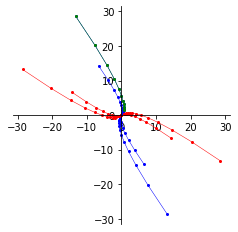

In [ ]:
t = np.linspace(-0.5, 0.5, 11)

for k in range(-2,3) :
    # a et b de même signe
    a = b = 2*k
    trajectoire(t,a,b,'blue')

    # a et b de signes contraires
    a = 2*k
    b =-2*k
    trajectoire(t,a,b,'red')

# Une trajectoire, en vert, avec conditions initiales particulières a = 4 et b = 4
trajectoire(t,4,4,"green")

plt.show()

* **Réponses temporelles**

On représente les deux fonctions $t \mapsto x(t)$ et $t \mapsto y(t)$ avec pour constantes dépendant des conditions initiales $a=1$ et $b=1$

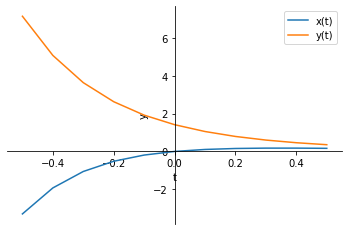

In [ ]:
plt.plot(t,x(t), label = 'x(t)')
plt.plot(t,y(t), label = 'y(t)')

# cosmétique #####
# nom des axes
plt.xlabel('t')
plt.ylabel('y') 
# légende
plt.legend()
# axes
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
###################

* **Champ de tangentes**

Dans le portrait de phase, on ajoute un maillage sur lequel on va dessiner les tangentes aux trajectoires.

In [ ]:
from scipy.integrate import odeint
import numpy as np


# Définition des conditions initiales
y0 = 1.5 # y(t_0)
yp0 = 2 # y'(t_0)

def phi(Y,t) :
    return [-3*Y[0] + Y[1] , Y[0] -3*Y[1] ]


tt = np.linspace(y0,3,201)
    
sol = odeint(phi, [y0,yp0],tt)

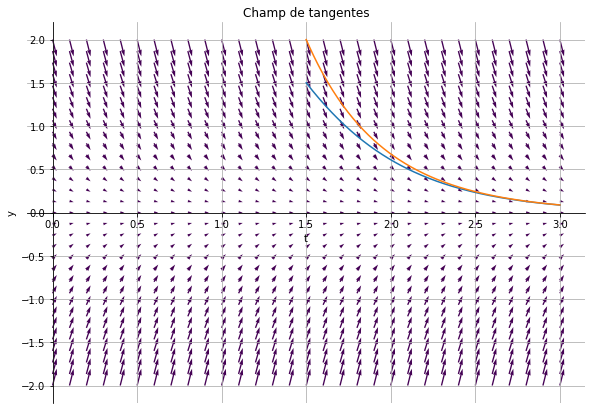

In [ ]:
plt.figure(figsize=(10,7))

# quiverplot
# définit une grille et calcule la direction en chaque point
subd = 31
g1  = np.linspace(0,3,subd)
g2  = np.linspace(-2,2,subd)
T,Y = np.meshgrid(g1,g2)        # crée la grille
DT = 1                          # calcule le taux d'accroissement en chaque point
DY = phi([Y,Y],T)

# norme (=longueur) du vecteur à afficher 
#M = sqrt(np.sum(np.reshape(DT**2+DY**2, subd**2, order = 'C')) ) 


# le champ de pentes
#plt.quiver(T,Y, DT/M, DY/M, M) # avec vecteurs normés
plt.quiver(T,Y, np.array(DT), np.array(DY[1]), 1)

# affichage graphique
plt.plot(tt,sol)
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Champ de tangentes');

# axes
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

## **1.3. Un système de trois équations différentielles à trois fonctions inconnues imbriquées, diagonalisable à trois valeurs propres distinctes, avec conditions initiales**

$\left\{\begin{matrix}
 x'& =  & x & + & 4y & - & 4z\\
 y'& = & 3x & + & 2y  & - & 4z\\
 z'& = & 3x & - & 3y  & + & z\\
\end{matrix}\right.$  avec pour conditions initiales $X_0 = X(0) = \left (\begin{matrix}
 1\\
 2\\
 3\\
\end{matrix}\right )$

In [ ]:
import numpy as np
import numpy.linalg as al

In [ ]:
# Matrice
A = np.array([[1, 4, -4 ], [ 3, 2, -4], [ 3, -3, 1]])
A

array([[ 1,  4, -4],
       [ 3,  2, -4],
       [ 3, -3,  1]])

In [ ]:
# Diagonalisation
D, V = al.eig(A)
D = np.diag(D)


In [ ]:
# Vecteurs propres
V1 = np.array([[V[i][0] for i in range(len(D))]])
V1 = np.transpose(V1)

V2 = np.array([[V[i][1] for i in range(len(D))]])
V2 = np.transpose(V2)

V3 = np.array([[V[i][2] for i in range(len(D))]])
V3 = np.transpose(V3)

# Valeurs propres
lambda_1 = D[0][0]
lambda_2 = D[1][1]
lambda_3 = D[2][2]

print('Valeurs propres : ', lambda_1,", ", lambda_2,", ", lambda_3)

#print('Vecteurs propres associés  :', V1,", ", V2,", ", V3)

Valeurs propres :  -1.9999999999999996 ,  1.0 ,  5.0


In [ ]:
X = lambda t : np.exp(lambda_1 * t)*V1
Y = lambda t : np.exp(lambda_2 * t)*V2
Z = lambda t : np.exp(lambda_3 * t)*V3

In [ ]:
a=2
b=1
c=-1

In [ ]:
S = lambda t : a*X(t)+b*Y(t)+c*Z(t)
S(0.5)

array([[ 7.66243442],
       [ 7.14217433],
       [-1.47214976]])

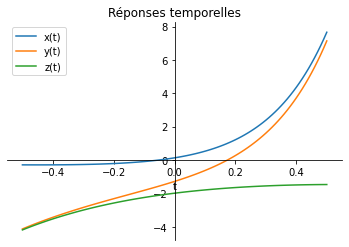

In [ ]:
t = np.linspace(-0.5,0.5,101)   # intervalle de temps
x = S(t)[0]                     # 1ère réponse temporelle
y = S(t)[1]                     # 2ème réponse temporelle
z = S(t)[2]                     # 3ème réponse temporelle

#graphique
plt.plot(t,x,label = 'x(t)')
plt.plot(t,y,label = 'y(t)')
plt.plot(t,z,label = 'z(t)' )

# cosmétique
plt.legend()
plt.title('Réponses temporelles')
plt.xlabel('t')

# axes
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.show()

* **Vue paramétrique**



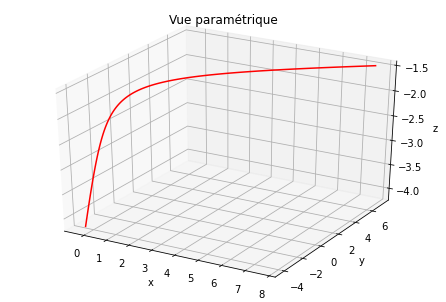

In [ ]:
import mpl_toolkits.mplot3d as plt3d
ax = plt3d.Axes3D(plt.figure())
 
ax.plot(x,y,z, color = 'red') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Vue paramétrique')
plt.show()